In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daten einlesen
nutzer = pd.read_csv("../Data/data_v3/Nutzer.csv")
beitraege = pd.read_csv("../Data/data_v3/Beitraege.csv")
likes = pd.read_csv("../Data/data_v3/Likes.csv")

# Schritt 1: Hashtag-Profile für alle Nutzer erstellen (nur die 4 häufigsten Hashtags pro Nutzer)
def get_user_top_hashtag_profile(user_ids, likes_df, beitraege_df, top_n=4):
    user_profiles = {}
    for uid in user_ids:
        user_likes = likes_df[likes_df['nutzer_id'] == uid]
        user_posts = beitraege_df[beitraege_df['beitrag_id'].isin(user_likes['beitrag_id'])]
        hashtags = user_posts['hashtags'].str.lower().str.replace(',', ' ').str.split().explode()
        top_hashtags = hashtags.value_counts().head(top_n)
        user_profiles[uid] = top_hashtags
    return pd.DataFrame(user_profiles).fillna(0).T

all_user_ids = nutzer['nutzer_id'].unique()
hashtag_profiles = get_user_top_hashtag_profile(all_user_ids, likes, beitraege, top_n=4)


# Schritt 2: Clustering nach Hashtag-Profilen (8 Cluster)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
nutzer['hashtag_cluster'] = kmeans.fit_predict(hashtag_profiles)

/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ginagrunen/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encounter

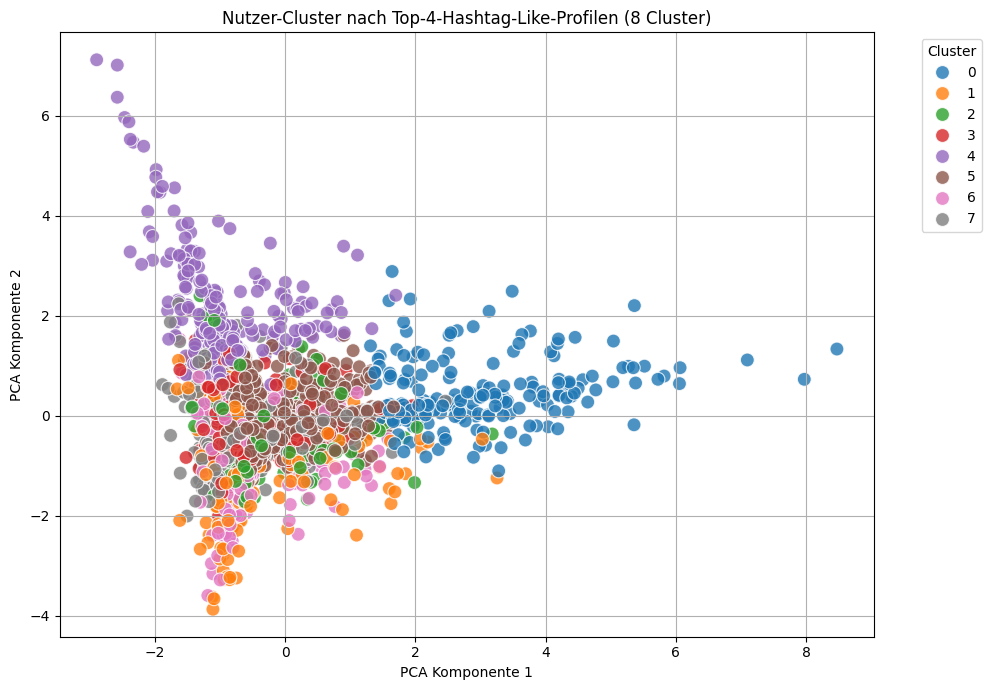

In [30]:
# Schritt 3: Visualisierung mit PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(hashtag_profiles)
nutzer['pca1'] = pca_result[:, 0]
nutzer['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10,7))
sns.scatterplot(data=nutzer, x='pca1', y='pca2', hue='hashtag_cluster', palette='tab10', s=100, alpha=0.8)
plt.title("Nutzer-Cluster nach Top-4-Hashtag-Like-Profilen (8 Cluster)")
plt.xlabel("PCA Komponente 1")
plt.ylabel("PCA Komponente 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Cluster 0: Top 4 Hashtags
hashtags
#bildungfüralle    354.0
#uni               328.0
#wissen            314.0
#lernen            311.0
dtype: float64


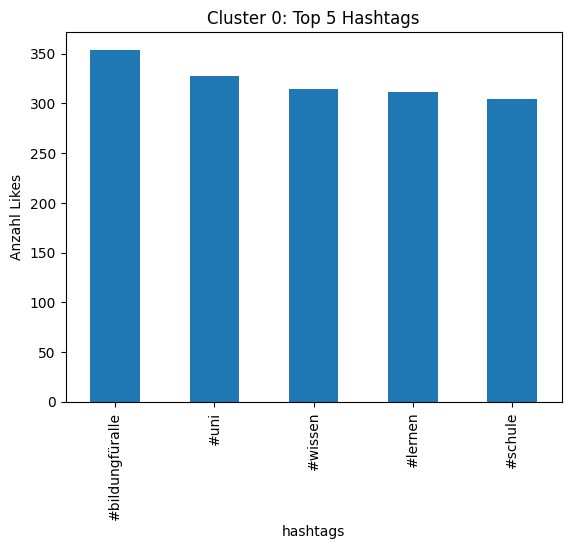


Cluster 1: Top 4 Hashtags
hashtags
#bandlife      491.0
#vinyl          96.0
#jamsession     93.0
#beats          84.0
dtype: float64


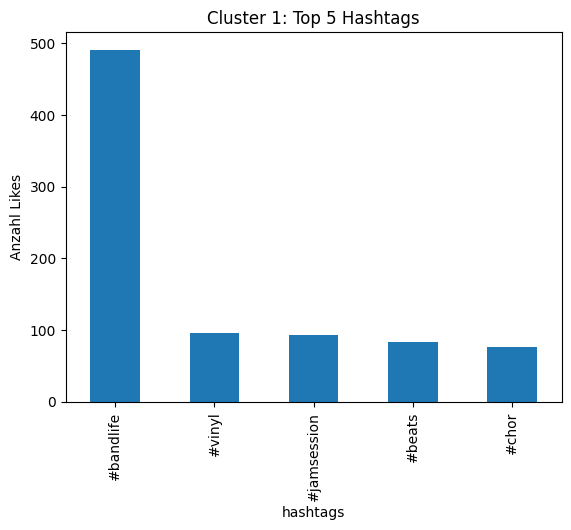


Cluster 2: Top 4 Hashtags
hashtags
#marathon      443.0
#basketball     91.0
#fussball       81.0
#skaten         68.0
dtype: float64


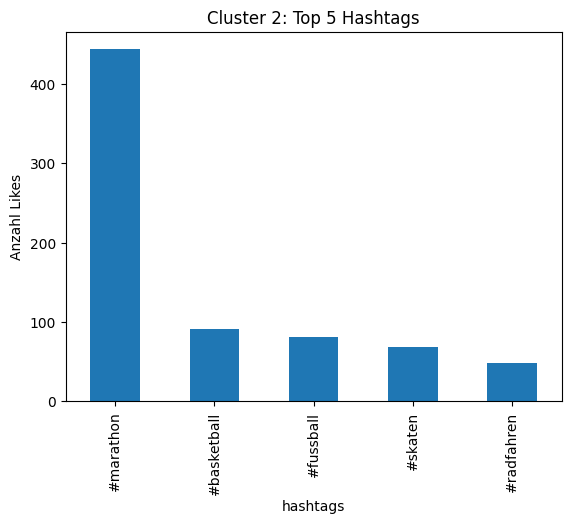


Cluster 3: Top 4 Hashtags
hashtags
#wanderlust    417.0
#citytrip      220.0
#meerliebe     189.0
#abenteuer     131.0
dtype: float64


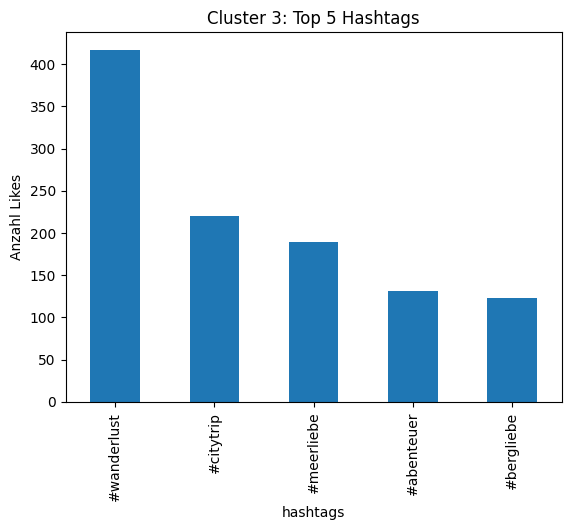


Cluster 4: Top 4 Hashtags
hashtags
#engagement       362.0
#gerechtigkeit    310.0
#klimapolitik     278.0
#wahlen           268.0
dtype: float64


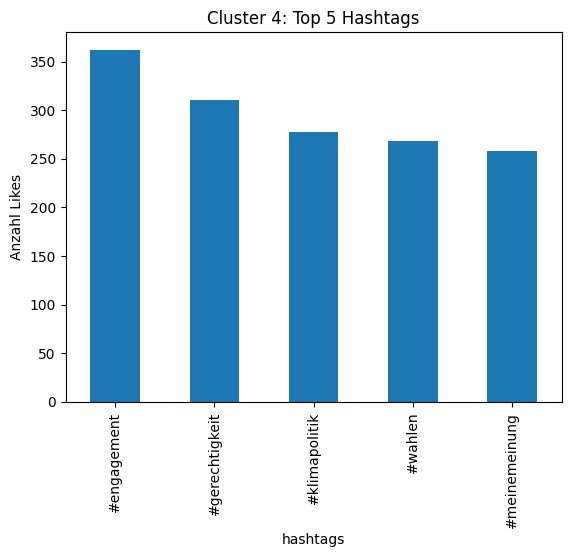


Cluster 5: Top 4 Hashtags
hashtags
#fussball          227.0
#skaten            212.0
#basketball        198.0
#bildungfüralle    175.0
dtype: float64


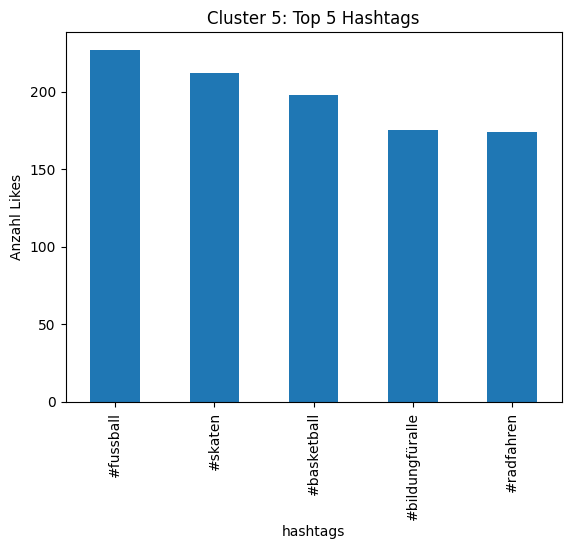


Cluster 6: Top 4 Hashtags
hashtags
#konzert       294.0
#chor          200.0
#musikliebe    193.0
#beats         177.0
dtype: float64


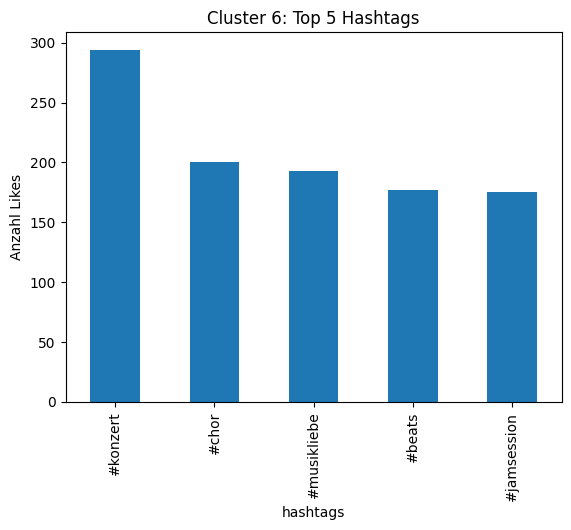


Cluster 7: Top 4 Hashtags
hashtags
#digitalisierung    334.0
#blockchain         293.0
#ki                 272.0
#robotik            253.0
dtype: float64


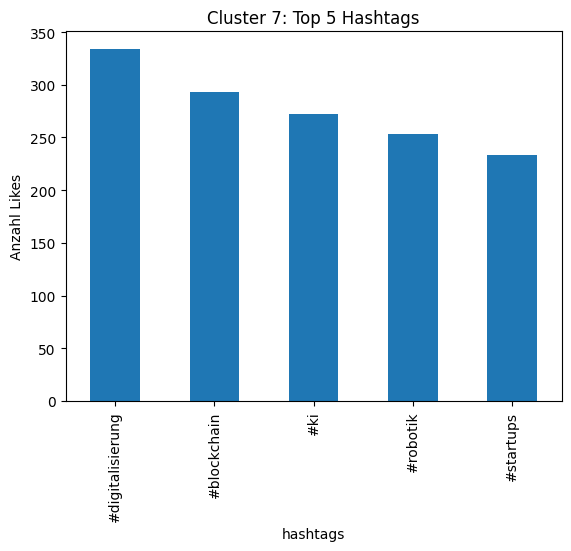

In [31]:

# Schritt 4: Hashtags pro Cluster ausgeben (Top 4 pro Cluster) + Balkendiagramm
for cluster in range(n_clusters):
    cluster_user_ids = nutzer[nutzer['hashtag_cluster'] == cluster]['nutzer_id']
    cluster_profile = hashtag_profiles.loc[cluster_user_ids].sum().sort_values(ascending=False)
    print(f"\nCluster {cluster}: Top 4 Hashtags")
    print(cluster_profile.head(4))
    cluster_profile.head(5).plot(kind='bar', title=f"Cluster {cluster}: Top 5 Hashtags")
    plt.ylabel("Anzahl Likes")
    plt.show()


In [35]:
# Schritt 5: Durchschnitts-Profile ("Persona") pro Cluster berechnen und ausgeben
cluster_features = ['alter', 'geschlecht', 'region', 'politische_haltung', 'gewaehlte_partei', 'wahlfrequenz', 'wichtigstes_wahlthema']

for cluster in range(n_clusters):
    print(f"\n--- Persona-Profil für Cluster {cluster} ---")
    cluster_nutzer = nutzer[nutzer['hashtag_cluster'] == cluster]
    # Numerische Features: Mittelwert
    if 'alter' in cluster_nutzer.columns:
        print(f"Durchschnittsalter: {cluster_nutzer['alter'].mean():.1f}")
    # Kategorische Features: Häufigster Wert (Modus)
    for feat in cluster_features:
        if feat in cluster_nutzer.columns and cluster_nutzer[feat].dtype == 'O':
            if feat == 'gewaehlte_partei':
                top3 = cluster_nutzer[feat].value_counts().head(3)
                if not top3.empty:
                    print(f"Top 3 {feat}:")
                    for partei, count in top3.items():
                        print(f"  {partei}: {count}")
            else:
                mode = cluster_nutzer[feat].mode()
                if not mode.empty:
                    print(f"Häufigste(r) {feat}: {mode.iloc[0]}")
    # Hashtags der Nutzer im Cluster als Liste ausgeben (nur Top 4)
    cluster_hashtags = hashtag_profiles.loc[cluster_nutzer['nutzer_id']].sum()
    hashtags_list = cluster_hashtags[cluster_hashtags > 0].sort_values(ascending=False).index.tolist()[:4]
    print(f"Top 4 Hashtags im Cluster: {hashtags_list}")
    print(f"Anzahl Nutzer im Cluster: {len(cluster_nutzer)}")
    # Weitere Analysen
    if 'geschlecht' in cluster_nutzer.columns:
        print("Geschlechterverteilung:")
        print(cluster_nutzer['geschlecht'].value_counts())
    if 'region' in cluster_nutzer.columns:
        print("Regionen:")
        print(cluster_nutzer['region'].value_counts())
    if 'wichtigstes_wahlthema' in cluster_nutzer.columns:
        print("Wichtigste Wahlthemen:")
        print(cluster_nutzer['wichtigstes_wahlthema'].value_counts())
    if 'politisches_engagement' in cluster_nutzer.columns:
        print(f"Ø politisches Engagement: {cluster_nutzer['politisches_engagement'].mean():.2f}")



--- Persona-Profil für Cluster 0 ---
Durchschnittsalter: 46.6
Häufigste(r) geschlecht: weiblich
Häufigste(r) region: Hessen
Häufigste(r) politische_haltung: progressiv
Top 3 gewaehlte_partei:
  SPD: 36
  CDU: 25
  Grüne: 20
Häufigste(r) wahlfrequenz: immer
Häufigste(r) wichtigstes_wahlthema: Klima
Top 4 Hashtags im Cluster: ['#bildungfüralle', '#uni', '#wissen', '#lernen']
Anzahl Nutzer im Cluster: 203
Geschlechterverteilung:
geschlecht
weiblich    103
männlich    100
Name: count, dtype: int64
Regionen:
region
Hessen     41
Hamburg    38
Bayern     36
NRW        36
Sachsen    29
Berlin     23
Name: count, dtype: int64
Wichtigste Wahlthemen:
wichtigstes_wahlthema
Klima         41
Bildung       39
Sicherheit    32
Gesundheit    32
Migration     31
Steuern       28
Name: count, dtype: int64
Ø politisches Engagement: 5.06

--- Persona-Profil für Cluster 1 ---
Durchschnittsalter: 47.3
Häufigste(r) geschlecht: weiblich
Häufigste(r) region: Hamburg
Häufigste(r) politische_haltung: konservati


--- Wähler/Nicht-Wähler pro Cluster ---
Cluster 0: Wähler = 128, Nicht-Wähler = 75, Gesamt = 203


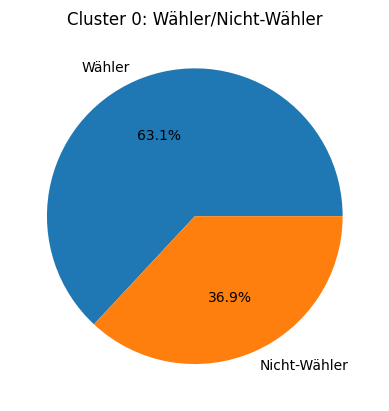

Cluster 1: Wähler = 109, Nicht-Wähler = 51, Gesamt = 160


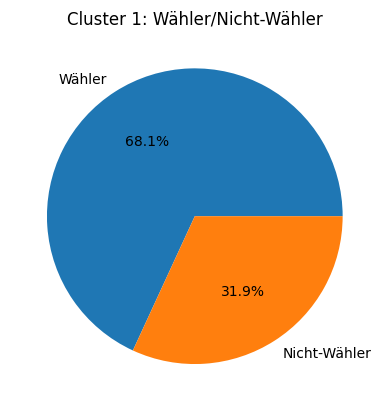

Cluster 2: Wähler = 113, Nicht-Wähler = 40, Gesamt = 153


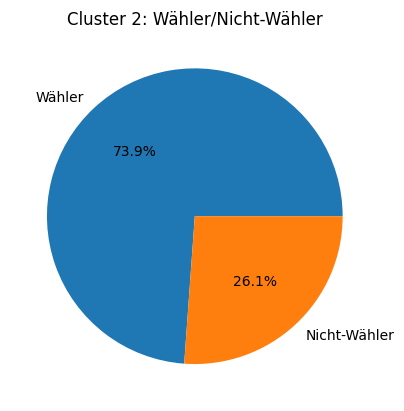

Cluster 3: Wähler = 116, Nicht-Wähler = 65, Gesamt = 181


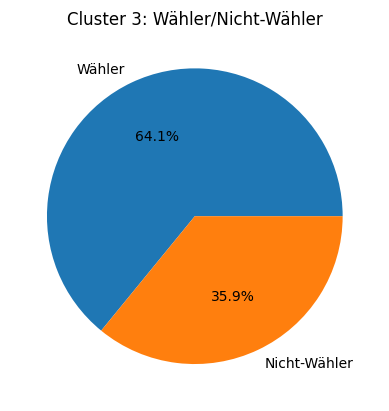

Cluster 4: Wähler = 152, Nicht-Wähler = 73, Gesamt = 225


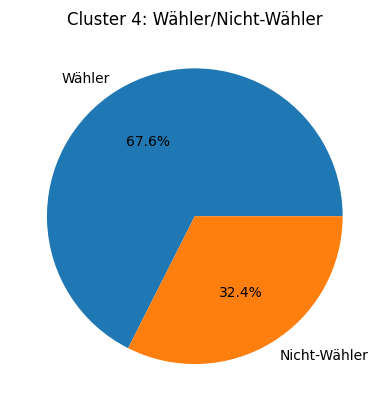

Cluster 5: Wähler = 484, Nicht-Wähler = 221, Gesamt = 705


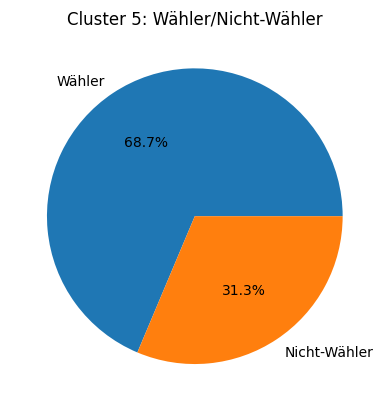

Cluster 6: Wähler = 113, Nicht-Wähler = 55, Gesamt = 168


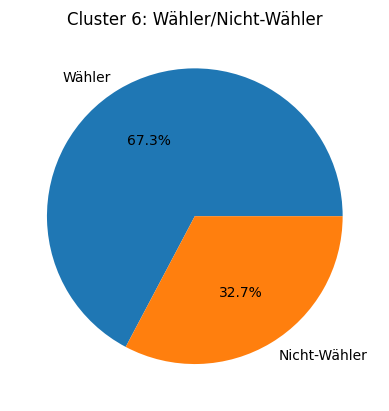

Cluster 7: Wähler = 140, Nicht-Wähler = 65, Gesamt = 205


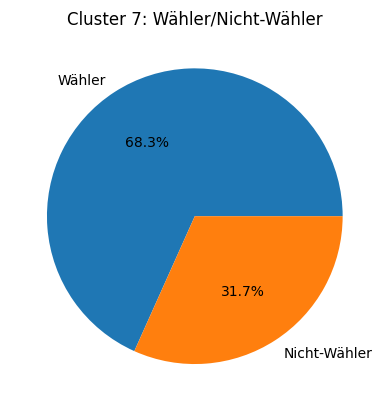

In [33]:
# Schritt 6: Wähler und Nicht-Wähler pro Cluster ausgeben (Text und Pie-Chart)
print("\n--- Wähler/Nicht-Wähler pro Cluster ---")
for cluster in range(n_clusters):
    cluster_nutzer = nutzer[nutzer['hashtag_cluster'] == cluster]
    waehler = cluster_nutzer[cluster_nutzer['wahlfrequenz'].str.lower().isin(['immer', 'gelegentlich'])].shape[0]
    nicht_waehler = cluster_nutzer[cluster_nutzer['wahlfrequenz'].str.lower() == 'nie'].shape[0]
    print(f"Cluster {cluster}: Wähler = {waehler}, Nicht-Wähler = {nicht_waehler}, Gesamt = {len(cluster_nutzer)}")
    plt.pie([waehler, nicht_waehler], labels=['Wähler', 'Nicht-Wähler'], autopct='%1.1f%%')
    plt.title(f"Cluster {cluster}: Wähler/Nicht-Wähler")
    plt.show()

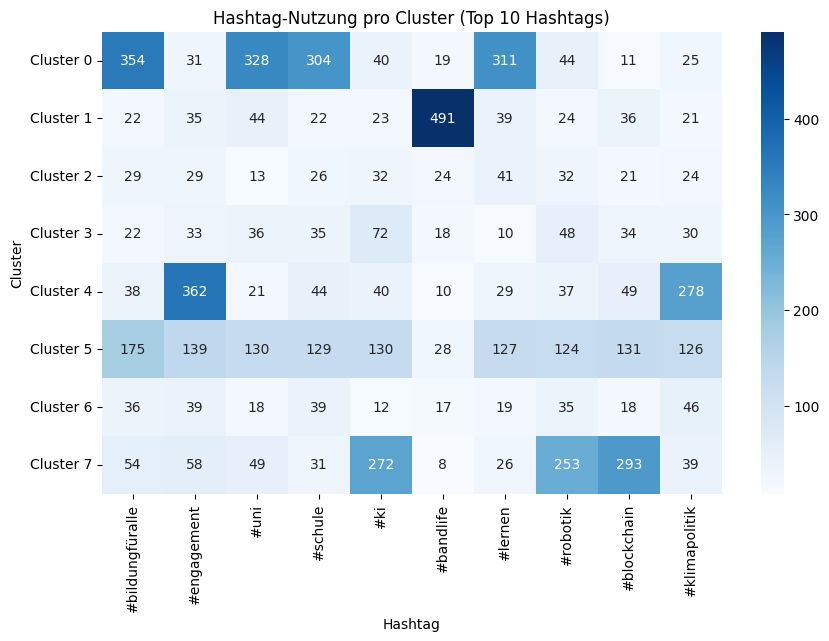

In [34]:


# Schritt 7: Heatmap der Hashtag-Nutzung pro Cluster (Top 10 Hashtags)
top_hashtags = hashtag_profiles.sum().sort_values(ascending=False).head(10).index
heatmap_data = []
for cluster in range(n_clusters):
    cluster_user_ids = nutzer[nutzer['hashtag_cluster'] == cluster]['nutzer_id']
    cluster_profile = hashtag_profiles.loc[cluster_user_ids][top_hashtags].sum()
    heatmap_data.append(cluster_profile.values)
plt.figure(figsize=(10,6))
sns.heatmap(np.array(heatmap_data), annot=True, fmt=".0f", cmap="Blues",
            yticklabels=[f"Cluster {i}" for i in range(n_clusters)],
            xticklabels=top_hashtags)
plt.title("Hashtag-Nutzung pro Cluster (Top 10 Hashtags)")
plt.xlabel("Hashtag")
plt.ylabel("Cluster")
plt.show()